In [111]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv


In [112]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC , SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

#from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [113]:
def boom1():
    beep = np.sin(2*np.pi*400*np.arange(10000*2)/10000)
    return ipd.Audio(beep, rate=10000, autoplay=True)

def boom2():
    audio_path="https://www.mfiles.co.uk/mp3-downloads/cherry-ripe.mp3"
    return ipd.Audio(audio_path, autoplay=True)

In [114]:
def s():
    print("="*50)

def ts():
    t_start = time.time()
    print("Time started...")
    s()
    s()
    return t_start

t_total = 0
def te(t1):
    t_end = time.time()
    t_time = t_end - t1
    s()
    s()
    global t_total
    t_total = t_total + t_time
    print("Time taken:",round(t_time, 4),"seconds.")
    s()
    print("Total Time:",round(t_total, 2),"seconds.")

In [115]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv


In [116]:
df_train = pd.read_csv('../input/human-activity-recognition-with-smartphones/train.csv')
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [117]:
df_train.shape

(7352, 563)

In [118]:
df_test = pd.read_csv('../input/human-activity-recognition-with-smartphones/test.csv')
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [119]:
df_test.shape

(2947, 563)

In [120]:
df_train[df_train.isna().values]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity


In [121]:
df_train[df_train.isnull().values]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity


In [122]:
df_test[df_test.isna().values]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity


In [123]:
df_test[df_test.isna().values]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity


In [124]:
df_train.duplicated().sum()

0

In [125]:
df_test.duplicated().sum()

0

In [126]:
# No NaN or Null or duplicated Values in any set.

In [127]:
df_train.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [128]:
df_train['Activity_labels'] = df_train['Activity'].map({'LAYING':5, 'STANDING':4, 'SITTING':3, 'WALKING':2, 'WALKING_UPSTAIRS':1, 
                                                      'WALKING_DOWNSTAIRS':0})

df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Activity_labels
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,4
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,4
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,4
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,4
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,4


In [129]:
df_test['Activity_labels'] = df_test['Activity'].map({'LAYING':5, 'STANDING':4, 'SITTING':3, 'WALKING':2, 'WALKING_UPSTAIRS':1, 
                                                      'WALKING_DOWNSTAIRS':0})

df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Activity_labels
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING,4
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING,4
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING,4
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING,4
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING,4


In [130]:
colu_names = df_train.columns

In [131]:
colu_names[:45]

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

In [132]:
uni = [0,40,80,120,160,200,213,226,239,252, 265,344,423,502,515,528,541,554,561,562,563]

In [133]:
for i in uni:
    print(i,", ",colu_names[i])

0 ,  tBodyAcc-mean()-X
40 ,  tGravityAcc-mean()-X
80 ,  tBodyAccJerk-mean()-X
120 ,  tBodyGyro-mean()-X
160 ,  tBodyGyroJerk-mean()-X
200 ,  tBodyAccMag-mean()
213 ,  tGravityAccMag-mean()
226 ,  tBodyAccJerkMag-mean()
239 ,  tBodyGyroMag-mean()
252 ,  tBodyGyroJerkMag-mean()
265 ,  fBodyAcc-mean()-X
344 ,  fBodyAccJerk-mean()-X
423 ,  fBodyGyro-mean()-X
502 ,  fBodyAccMag-mean()
515 ,  fBodyBodyAccJerkMag-mean()
528 ,  fBodyBodyGyroMag-mean()
541 ,  fBodyBodyGyroJerkMag-mean()
554 ,  angle(tBodyAccMean,gravity)
561 ,  subject
562 ,  Activity
563 ,  Activity_labels


<AxesSubplot:xlabel='Activity', ylabel='Count'>

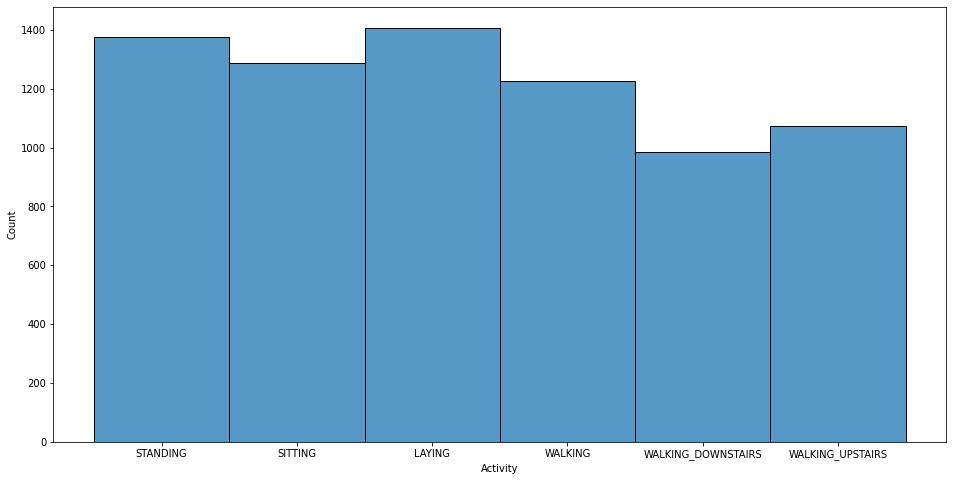

In [134]:
plt.figure(figsize=(16,8))
sns.histplot(data=df_train, x=df_train.Activity)

<AxesSubplot:xlabel='Activity', ylabel='Count'>

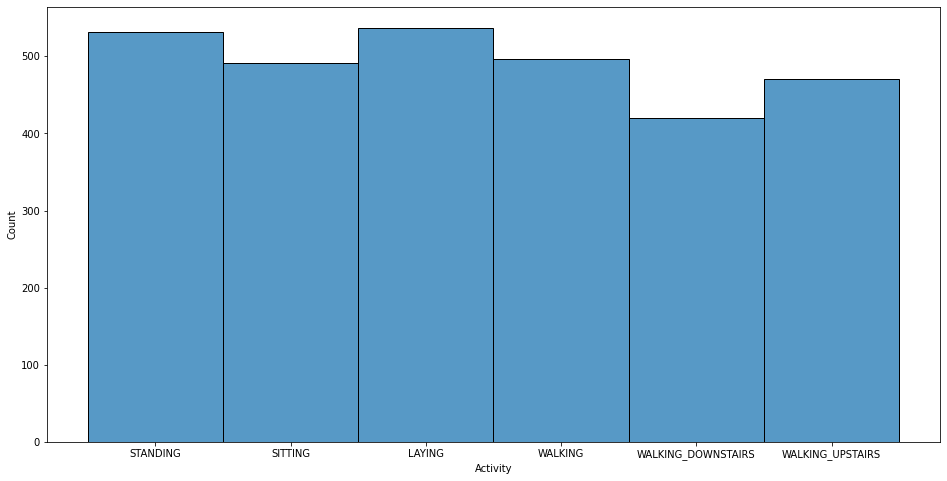

In [135]:
plt.figure(figsize=(16,8))
sns.histplot(data=df_test, x=df_test.Activity)

<AxesSubplot:xlabel='subject', ylabel='count'>

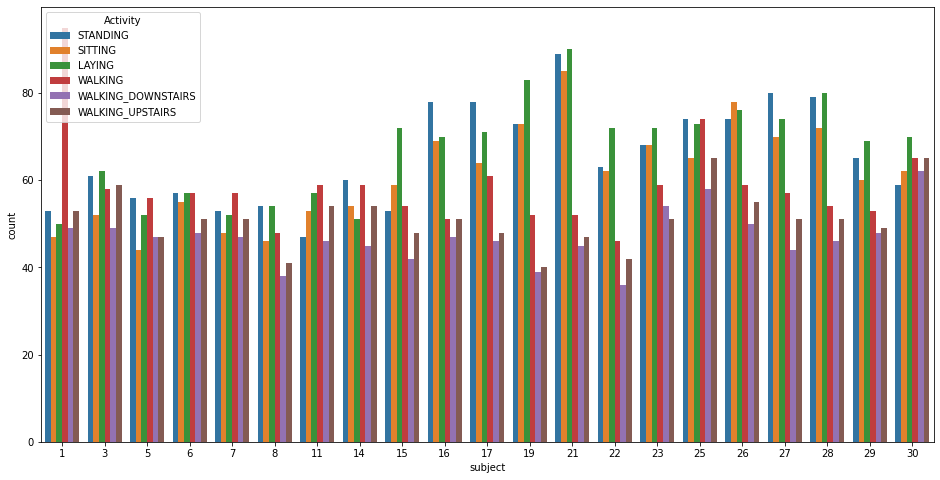

In [136]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_train, x=df_train.subject, hue=df_train.Activity)

<AxesSubplot:xlabel='subject', ylabel='count'>

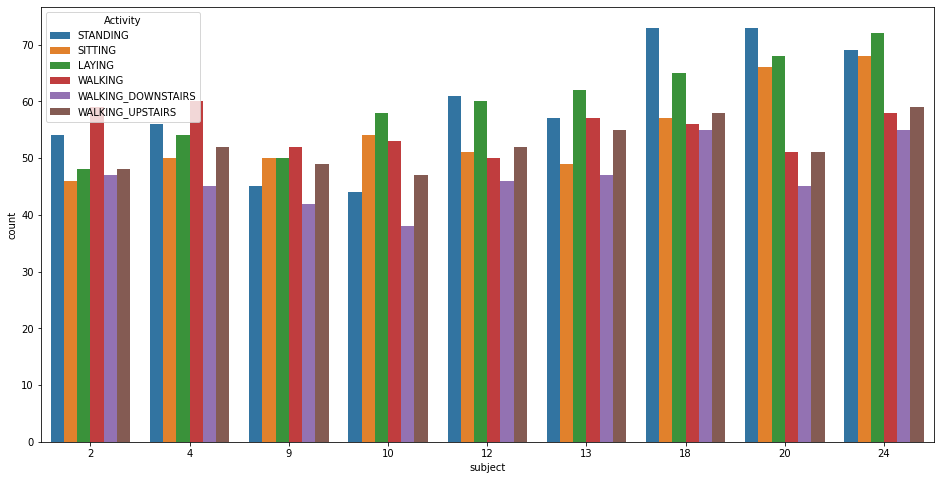

In [137]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_train, x=df_test.subject, hue=df_test.Activity)

<AxesSubplot:xlabel='tBodyAccMag-mean()', ylabel='Density'>

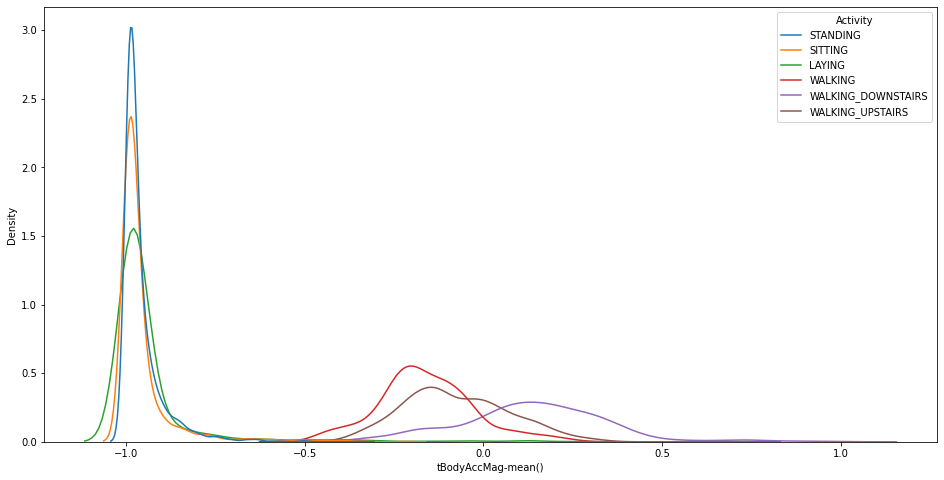

In [138]:
plt.figure(figsize=(16,8))
sns.kdeplot(data=df_train, x=df_train['tBodyAccMag-mean()'],hue=df_train.Activity)

<AxesSubplot:xlabel='tBodyAccMag-mean()', ylabel='Density'>

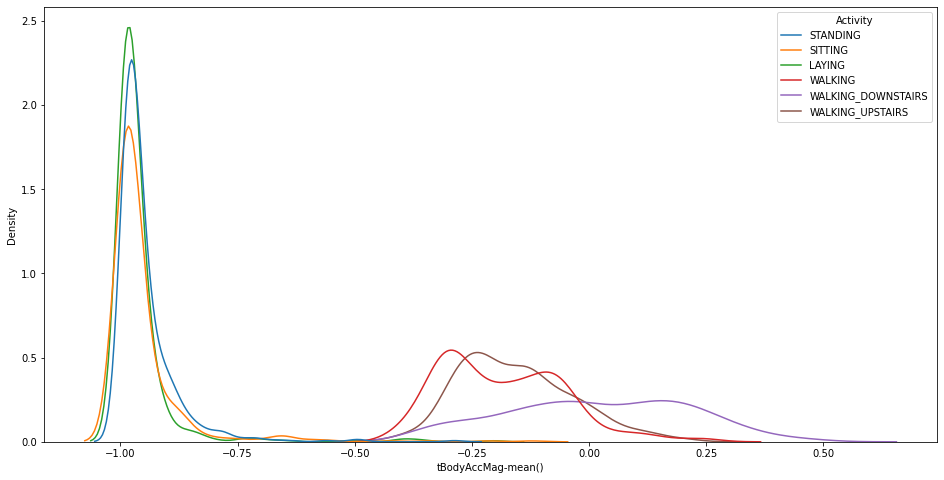

In [139]:
plt.figure(figsize=(16,8))
sns.kdeplot(data=df_test, x=df_test['tBodyAccMag-mean()'], hue=df_test.Activity)

In [140]:
x_train = df_train.drop(['subject', 'Activity', 'Activity_labels'], axis=1)
print(x_train.shape)
x_train.head()

(7352, 561)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [141]:
y_train = df_train['Activity_labels']
print(y_train.shape)
y_train.head()

(7352,)


0    4
1    4
2    4
3    4
4    4
Name: Activity_labels, dtype: int64

In [142]:
y_train.value_counts()

5    1407
4    1374
3    1286
2    1226
1    1073
0     986
Name: Activity_labels, dtype: int64

In [143]:
y_train_labels = y_train.map({ 0:'WALKING_DOWNSTAIRS', 1:'WALKING_UPSTAIRS',2: 'WALKING',3:'SITTING', 4:'STANDING',5:'LAYING'})

print(y_train_labels.shape)
y_train_labels.head()

(7352,)


0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: Activity_labels, dtype: object

In [144]:
x_test = df_test.drop(['subject', 'Activity', 'Activity_labels'], axis=1)
print(x_test.shape)
x_test.head()

(2947, 561)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [145]:
y_test = df_test['Activity_labels']
print(y_test.shape)
y_test.head()

(2947,)


0    4
1    4
2    4
3    4
4    4
Name: Activity_labels, dtype: int64

In [146]:
y_test.value_counts()

5    537
4    532
2    496
3    491
1    471
0    420
Name: Activity_labels, dtype: int64

In [147]:
# y_test_labels = y_train.map({  0:'WALKING_DOWNSTAIRS', 1:'WALKING_UPSTAIRS',2: 'WALKING',3:'SITTING', 4:'STANDING',5:'LAYING'})

# print(y_test_labels.shape)
# y_test_labels.head()

In [148]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [149]:
print(x_train.shape)
print(x_test.shape)

(7352, 561)
(2947, 561)


In [150]:
t=ts()

tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, verbose = 10)
tsne_data = tsne_model.fit_transform(x_train)

te(t)

Time started...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.545s...
[t-SNE] Computed neighbors for 7352 samples in 50.738s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 4.150695
[t-SNE] Computed conditional probabilities in 0.496s
[t-SNE] Iteration 50: error = 93.0963135, gradient norm = 0.0101952 (50 iterations in 2.111s)
[t-SNE] Iteration 100: error = 82.1590958, gradient norm = 0.0065396 (50 iterations in 1.824s)
[t-SNE] Iteration 150: error = 80.8924179, 

In [151]:
#boom1()

In [152]:
tsne_df = pd.DataFrame(tsne_data ,columns = ["x","y"])
tsne_df["Activity"] = y_train_labels


print(tsne_df.shape)
tsne_df.head()

(7352, 3)


,x,y,Activity
0,-44.560661,3.524334,STANDING
1,-52.663845,12.639957,STANDING
2,-40.027798,2.336640,STANDING
3,-51.077400,21.623056,STANDING
4,-66.499908,-1.747918,STANDING


<AxesSubplot:xlabel='x', ylabel='y'>

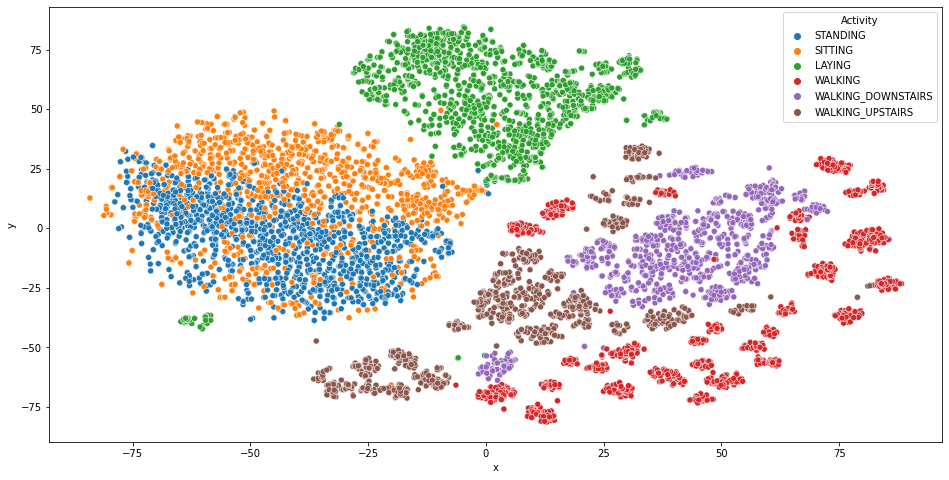

In [153]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=tsne_df, x="x",y="y",hue="Activity")

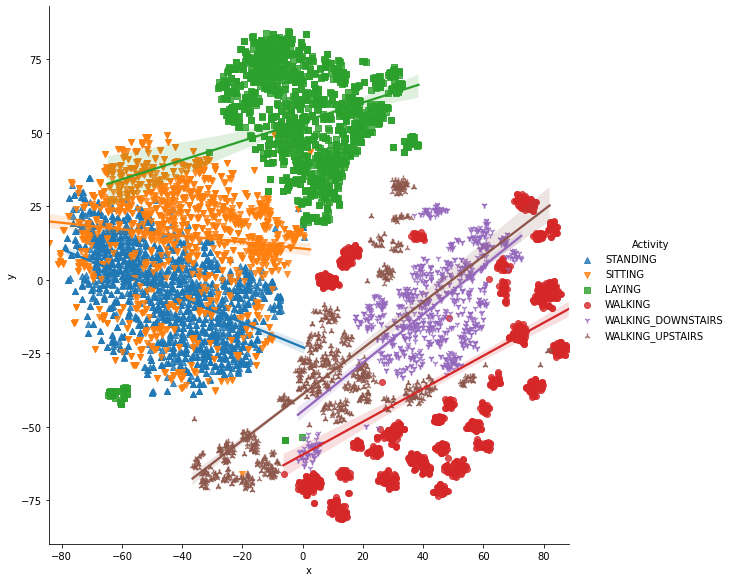

In [154]:
#plt.figure(figsize=(16,8))
sns.lmplot(data=tsne_df, x="x",y="y",hue="Activity", markers=['^','v','s','o', '1','2'], height=8, aspect=1)

In [155]:
acc_scores = []

In [156]:
def model_run(model,x_train,y_train,x_test,y_test):
    t=ts()
    model = model.fit(x_train,y_train)
    train_ypred = model.predict(x_train)
    ypred = model.predict(x_test)
    print("Best Estimator")
    print(model.best_estimator_)
    print("\n")
    print("Best Parameter")
    print(model.best_params_)
    print("\n")
    print("Best Score")
    print(model.best_score_)
    print("\n")
    print("Train Accuracy score ",accuracy_score(y_train, train_ypred))
    print("Test Accuracy score ",accuracy_score(y_test, ypred))
    print("\n\n")
    print("Confusion matrix", confusion_matrix(y_test,ypred))
    print("\n\n")
    print("Classfication report")
    print(classification_report(y_test,ypred))
    te(t)
    return model

In [157]:
model = KNeighborsClassifier()

params = {'weights': ['uniform','distance']}

grid_search = GridSearchCV(model,param_grid=params , verbose=10, n_jobs=-1)

model = model_run(grid_search,x_train,y_train,x_test,y_test)

ypred = model.predict(x_test)
train_ypred_log = model.predict_proba(x_train)
ypred_log = model.predict_proba(x_test)
print('\n')
print("Train log-loss ",log_loss(y_train, train_ypred_log))
print("Test log-loss ",log_loss(y_test, ypred_log))

acc_scores.append(['KNN: ' ,accuracy_score(y_test, ypred)])

Time started...
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   23.6s remaining:   23.6s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   24.2s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   32.8s finished


Best Estimator
KNeighborsClassifier(weights='distance')


Best Parameter
{'weights': 'distance'}


Best Score
0.8724178563335598


Train Accuracy score  1.0
Test Accuracy score  0.8842891075670173



Confusion matrix [[317  49  54   0   0   0]
 [  5 424  42   0   0   0]
 [ 10   4 482   0   0   0]
 [  0   1   0 373 115   2]
 [  0   0   0  35 497   0]
 [  0   0   0  14  10 513]]



Classfication report
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       420
           1       0.89      0.90      0.89       471
           2       0.83      0.97      0.90       496
           3       0.88      0.76      0.82       491
           4       0.80      0.93      0.86       532
           5       1.00      0.96      0.98       537

    accuracy                           0.88      2947
   macro avg       0.89      0.88      0.88      2947
weighted avg       0.89      0.88      0.88      2947

Time taken: 99.3661 seconds.
Total Time: 184.98 secon

In [158]:
acc_scores

[['KNN: ', 0.8842891075670173]]

In [159]:
model = BernoulliNB()

params = {}

grid_search = GridSearchCV(model,param_grid=params , verbose=10, n_jobs=-1)

model = model_run(grid_search,x_train,y_train,x_test,y_test)

ypred = model.predict(x_test)
train_ypred_log = model.predict_proba(x_train)
ypred_log = model.predict_proba(x_test)
print('\n')
print("Train log-loss ",log_loss(y_train, train_ypred_log))
print("Test log-loss ",log_loss(y_test, ypred_log))

acc_scores.append(['Naive_Bayes: ' ,accuracy_score(y_test, ypred)])

Time started...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1510s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


Best Estimator
BernoulliNB()


Best Parameter
{}


Best Score
0.8056289164204091


Train Accuracy score  0.8260337323177367
Test Accuracy score  0.8198167628096369



Confusion matrix [[330  59  31   0   0   0]
 [ 89 363  19   0   0   0]
 [ 71  27 398   0   0   0]
 [  0   2   0 326 146  17]
 [  0   1   0  47 484   0]
 [  0   1   0  21   0 515]]



Classfication report
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       420
           1       0.80      0.77      0.79       471
           2       0.89      0.80      0.84       496
           3       0.83      0.66      0.74       491
           4       0.77      0.91      0.83       532
           5       0.97      0.96      0.96       537

    accuracy                           0.82      2947
   macro avg       0.82      0.82      0.81      2947
weighted avg       0.83      0.82      0.82      2947

Time taken: 0.6255 seconds.
Total Time: 185.61 seconds.


Train log-loss  2.7993146981

In [160]:
acc_scores

[['KNN: ', 0.8842891075670173], ['Naive_Bayes: ', 0.8198167628096369]]

In [161]:
model = LogisticRegression(max_iter = 1000)

params = {"C" : [0.01,0.1,1,10,20,30],"penalty" : ["l1","l2"]}

model = grid_search = GridSearchCV(model, param_grid = params, cv=3, verbose = 10, n_jobs = -1)

model_run(grid_search,x_train,y_train,x_test,y_test)

ypred = model.predict(x_test)
train_ypred_log = model.predict_proba(x_train)
ypred_log = model.predict_proba(x_test)
print('\n')
print("Train log-loss ",log_loss(y_train, train_ypred_log))
print("Test log-loss ",log_loss(y_test, ypred_log))

acc_scores.append(['Logistic_Regression: ' ,accuracy_score(y_test, ypred)])

Time started...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0826s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (7.0889s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:  1.0min remaining:   14.8s
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed:  1.3min remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.5min finished


Best Estimator
LogisticRegression(C=0.1, max_iter=1000)


Best Parameter
{'C': 0.1, 'penalty': 'l2'}


Best Score
0.9348486942716704


Train Accuracy score  0.9903427638737758
Test Accuracy score  0.9497794367153037



Confusion matrix [[395  18   7   0   0   0]
 [  1 446  24   0   0   0]
 [  3   0 493   0   0   0]
 [  0   3   0 429  59   0]
 [  0   0   0  19 513   0]
 [  0   0   0   0  14 523]]



Classfication report
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       420
           1       0.96      0.95      0.95       471
           2       0.94      0.99      0.97       496
           3       0.96      0.87      0.91       491
           4       0.88      0.96      0.92       532
           5       1.00      0.97      0.99       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947

Time taken: 104.9415 seconds.
Tota

In [162]:
acc_scores

[['KNN: ', 0.8842891075670173],
 ['Naive_Bayes: ', 0.8198167628096369],
 ['Logistic_Regression: ', 0.9497794367153037]]

In [163]:
model = SGDClassifier()

params = {"penalty" : ["l1","l2"] , 'loss' : ['hinge', 'log']}

model = grid_search = GridSearchCV(model, param_grid = params, cv=3, verbose = 10, n_jobs = -1)

model_run(grid_search,x_train,y_train,x_test,y_test)
ypred = model.predict(x_test)
acc_scores.append(['SGD: ' ,accuracy_score(y_test, ypred)])

Time started...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:   12.0s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:   15.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   23.1s finished


Best Estimator
SGDClassifier(loss='log')


Best Parameter
{'loss': 'log', 'penalty': 'l2'}


Best Score
0.9302235100486542


Train Accuracy score  0.9874863982589771
Test Accuracy score  0.9368849677638276



Confusion matrix [[367  32  21   0   0   0]
 [  2 437  32   0   0   0]
 [  2   0 494   0   0   0]
 [  0   3   0 431  56   1]
 [  0   0   0  18 514   0]
 [  0   0   0   0  19 518]]



Classfication report
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       420
           1       0.93      0.93      0.93       471
           2       0.90      1.00      0.95       496
           3       0.96      0.88      0.92       491
           4       0.87      0.97      0.92       532
           5       1.00      0.96      0.98       537

    accuracy                           0.94      2947
   macro avg       0.94      0.93      0.94      2947
weighted avg       0.94      0.94      0.94      2947

Time taken: 25.9585 seconds.
Total Time: 316

In [164]:
acc_scores

[['KNN: ', 0.8842891075670173],
 ['Naive_Bayes: ', 0.8198167628096369],
 ['Logistic_Regression: ', 0.9497794367153037],
 ['SGD: ', 0.9368849677638276]]

In [174]:
model = LinearSVC(max_iter = 3000,tol= 0.00005)

params = {"C": [0.01,0.1,1,10,20,30],"penalty":["l1","l2"]}

model = grid_search = GridSearchCV(model, param_grid = params, cv=3, verbose = 10, n_jobs = -1)

model_run(grid_search,x_train,y_train,x_test,y_test)
ypred = model.predict(x_test)
#acc_scores.append(['Linear_SVC: ' ,accuracy_score(y_test, ypred)])

Time started...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0612s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (5.4931s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:   28.0s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed:   37.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   44.4s finished


Best Estimator
LinearSVC(C=0.1, max_iter=3000, tol=5e-05)


Best Parameter
{'C': 0.1, 'penalty': 'l2'}


Best Score
0.9382506099134881


Train Accuracy score  0.9945593035908596
Test Accuracy score  0.9619952494061758



Confusion matrix [[413   4   2   1   0   0]
 [  0 459  12   0   0   0]
 [  0   2 494   0   0   0]
 [  0   4   0 426  61   0]
 [  0   0   0  15 517   0]
 [  0   0   0   0  11 526]]



Classfication report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       420
           1       0.98      0.97      0.98       471
           2       0.97      1.00      0.98       496
           3       0.96      0.87      0.91       491
           4       0.88      0.97      0.92       532
           5       1.00      0.98      0.99       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Time taken: 53.1149 seconds.
Tot

In [166]:
acc_scores

[['KNN: ', 0.8842891075670173],
 ['Naive_Bayes: ', 0.8198167628096369],
 ['Logistic_Regression: ', 0.9497794367153037],
 ['SGD: ', 0.9368849677638276],
 ['Linear_SVC: ', 0.9619952494061758]]

In [167]:
model = SVC(kernel = "rbf")

params = { "C": [1.8,2,2.2] , "gamma" :[0.0001,0.001,0.003]}

model = grid_search = GridSearchCV(model, param_grid = params, cv=3, verbose = 10, n_jobs = -1)

model_run(grid_search,x_train,y_train,x_test,y_test)

ypred = model.predict(x_test)

acc_scores.append(['Kernel_SVC: ' ,accuracy_score(y_test, ypred)])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Time started...
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  23 out of  27 | elapsed:  1.0min remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.2min finished


Best Estimator
SVC(C=2.2, gamma=0.001)


Best Parameter
{'C': 2.2, 'gamma': 0.001}


Best Score
0.9328093211988998


Train Accuracy score  0.9872143634385201
Test Accuracy score  0.9518154054971157



Confusion matrix [[383  30   7   0   0   0]
 [  2 454  15   0   0   0]
 [  4   6 486   0   0   0]
 [  0   1   0 440  48   2]
 [  0   0   0  27 505   0]
 [  0   0   0   0   0 537]]



Classfication report
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       420
           1       0.92      0.96      0.94       471
           2       0.96      0.98      0.97       496
           3       0.94      0.90      0.92       491
           4       0.91      0.95      0.93       532
           5       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947

Time taken: 97.8196 seconds.
Total Time: 458.86 seco

In [168]:
acc_scores

[['KNN: ', 0.8842891075670173],
 ['Naive_Bayes: ', 0.8198167628096369],
 ['Logistic_Regression: ', 0.9497794367153037],
 ['SGD: ', 0.9368849677638276],
 ['Linear_SVC: ', 0.9619952494061758],
 ['Kernel_SVC: ', 0.9518154054971157]]

In [169]:
model = DecisionTreeClassifier()

params = {"max_depth" : np.arange(3,8)}

grid_search = GridSearchCV(model, param_grid = params, cv=3, verbose = 10, n_jobs = -1)

model = model_run(grid_search,x_train,y_train,x_test,y_test)

ypred = model.predict(x_test)
train_ypred_log = model.predict_proba(x_train)
ypred_log = model.predict_proba(x_test)
print('\n')
print("Train log-loss ",log_loss(y_train, train_ypred_log))
print("Test log-loss ",log_loss(y_test, ypred_log))

acc_scores.append(['Decision_Tree: ' ,accuracy_score(y_test, ypred)])

Time started...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:    5.8s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    6.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    8.5s finished


Best Estimator
DecisionTreeClassifier(max_depth=4)


Best Parameter
{'max_depth': 4}


Best Score
0.8408604012800551


Train Accuracy score  0.8982589771490751
Test Accuracy score  0.8096369189005769



Confusion matrix [[261  52 107   0   0   0]
 [  6 336 129   0   0   0]
 [ 11  48 437   0   0   0]
 [  0   0   0 397  94   0]
 [  0   0   0 114 418   0]
 [  0   0   0   0   0 537]]



Classfication report
              precision    recall  f1-score   support

           0       0.94      0.62      0.75       420
           1       0.77      0.71      0.74       471
           2       0.65      0.88      0.75       496
           3       0.78      0.81      0.79       491
           4       0.82      0.79      0.80       532
           5       1.00      1.00      1.00       537

    accuracy                           0.81      2947
   macro avg       0.83      0.80      0.80      2947
weighted avg       0.83      0.81      0.81      2947

Time taken: 10.415 seconds.
Total Time: 469.28 sec

In [170]:
acc_scores

[['KNN: ', 0.8842891075670173],
 ['Naive_Bayes: ', 0.8198167628096369],
 ['Logistic_Regression: ', 0.9497794367153037],
 ['SGD: ', 0.9368849677638276],
 ['Linear_SVC: ', 0.9619952494061758],
 ['Kernel_SVC: ', 0.9518154054971157],
 ['Decision_Tree: ', 0.8096369189005769]]

In [171]:
model = RandomForestClassifier(n_jobs = -1)

params = {"n_estimators" : np.arange(260,360,20)  , "max_depth" : np.arange(3,15,2) }

grid_search = GridSearchCV(model, param_grid = params, cv=3, verbose = 10, n_jobs = -1)

model = model_run(grid_search,x_train,y_train,x_test,y_test)

ypred = model.predict(x_test)
train_ypred_log = model.predict_proba(x_train)
ypred_log = model.predict_proba(x_test)
print('\n')
print("Train log-loss ",log_loss(y_train, train_ypred_log))
print("Test log-loss ",log_loss(y_test, ypred_log))

acc_scores.append(['Random_Forest: ' ,accuracy_score(y_test, ypred)])

Time started...
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  9.5min finished


Best Estimator
RandomForestClassifier(max_depth=7, n_estimators=280, n_jobs=-1)


Best Parameter
{'max_depth': 7, 'n_estimators': 280}


Best Score
0.9168933962814011


Train Accuracy score  0.9782372143634385
Test Accuracy score  0.9117746861214795



Confusion matrix [[337  45  38   0   0   0]
 [  6 424  41   0   0   0]
 [ 10   2 484   0   0   0]
 [  0   0   0 422  69   0]
 [  0   0   0  49 483   0]
 [  0   0   0   0   0 537]]



Classfication report
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       420
           1       0.90      0.90      0.90       471
           2       0.86      0.98      0.91       496
           3       0.90      0.86      0.88       491
           4       0.88      0.91      0.89       532
           5       1.00      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



In [172]:
acc_scores

[['KNN: ', 0.8842891075670173],
 ['Naive_Bayes: ', 0.8198167628096369],
 ['Logistic_Regression: ', 0.9497794367153037],
 ['SGD: ', 0.9368849677638276],
 ['Linear_SVC: ', 0.9619952494061758],
 ['Kernel_SVC: ', 0.9518154054971157],
 ['Decision_Tree: ', 0.8096369189005769],
 ['Random_Forest: ', 0.9117746861214795]]

In [176]:
boom1()

In [180]:
# # XGBOOST
# # GridSearchCV is not working :/

# t=ts()

# gamma = [0.5, 1, 1.5, 2, 5]
# colsample_bytree = [0.6, 0.8, 1.0]
# subsample = [0.6, 0.8, 1.0]
# min_child_weight = [1, 5, 10]
# max_depth = [4,5,6]
# n_estimators = [120,130,140]
# #total = 3*3*3*3*3*5 = 1215
 
# xgb_acc = [] 
# xgb_acc.append(['n_estimators', 'max_depth', 'min_child_weight', 'subsample', 'colsample_bytree', 
#                 'gamma','accuracy_score', 'log_loss'])

# for i in range(len(n_estimators)):
#     for j in range(len(max_depth)):
#         for k in range(len(min_child_weight)):
#             for l in range(len(subsample)):
#                 for m in range(len(colsample_bytree)):
#                     for n in range(len(gamma)):
                        
#                         print('n_estimators: ', n_estimators[i])
#                         print('max_depth: ', max_depth[j])
#                         print('min_child_weight: ', min_child_weight[k])
#                         print('subsample: ', subsample[l])
#                         print('colsample_bytree: ', colsample_bytree[m])
#                         print('gamma: ', gamma[n])
                        
#                         model = XGBClassifier(n_estimators = n_estimators[i], max_depth = max_depth[j], 
#                                               min_child_weight = min_child_weight[k], subsample = subsample[l], 
#                                               colsample_bytree = colsample_bytree[m], gamma = gamma[n], 
#                                               objective='multi:softprob',eval_metric='mlogloss', use_label_encoder=False,
#                                               verbosity=0, n_jobs = -1 )
                        
#                         model.fit(x_train, y_train)
#                         train_ypred = model.predict(x_train)
#                         ypred = model.predict(x_test)
#                         print("\n")
#                         print("Train Accuracy score ",accuracy_score(y_train, train_ypred))
#                         print("Test Accuracy score ",accuracy_score(y_test, ypred))
#                         print("\n\n")
#                         print("Confusion matrix", confusion_matrix(y_test,ypred))
#                         print("\n\n")
#                         print("Classfication report\n")
#                         print(classification_report(y_test,ypred))
#                         train_ypred_log = model.predict_proba(x_train)
#                         ypred_log = model.predict_proba(x_test)
#                         print('\n')
#                         print("Train log-loss ",log_loss(y_train, train_ypred_log))
#                         print("Test log-loss ",log_loss(y_test, ypred_log))
                        
#                         xgb_acc.append([n_estimators[i], max_depth[j], min_child_weight[k], subsample[l], colsample_bytree[m], 
#                                         gamma[n],accuracy_score(y_test, ypred), log_loss(y_test, ypred_log)])
#                         print("=============================")
                        
# te(t)


In [ ]:
# print(xgb_acc)

In [ ]:
# boom1()

In [182]:
t=ts()
model = XGBClassifier(objective='multi:softprob',eval_metric='mlogloss', use_label_encoder=False, verbosity=0, n_jobs = -1 )
model.fit(x_train, y_train)
train_ypred = model.predict(x_train)
ypred = model.predict(x_test)
print("\n")
print("Train Accuracy score ",accuracy_score(y_train, train_ypred))
print("Test Accuracy score ",accuracy_score(y_test, ypred))
print("\n")
print("Confusion matrix", confusion_matrix(y_test,ypred))
print("\n")
print("Classfication report\n")
print(classification_report(y_test,ypred))
train_ypred_log = model.predict_proba(x_train)
ypred_log = model.predict_proba(x_test)
print('\n')
print("Train log-loss ",log_loss(y_train, train_ypred_log))
print("Test log-loss ",log_loss(y_test, ypred_log))

te(t)

acc_scores.append(['XGBOOST: ' ,accuracy_score(y_test, ypred)])

Time started...


Train Accuracy score  1.0
Test Accuracy score  0.9389209365456397


Confusion matrix [[384  27   9   0   0   0]
 [  5 435  31   0   0   0]
 [  5   4 487   0   0   0]
 [  0   3   0 420  68   0]
 [  0   0   0  28 504   0]
 [  0   0   0   0   0 537]]


Classfication report

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       420
           1       0.93      0.92      0.93       471
           2       0.92      0.98      0.95       496
           3       0.94      0.86      0.89       491
           4       0.88      0.95      0.91       532
           5       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



Train log-loss  0.0005753339325486272
Test log-loss  0.17112967430658788
Time taken: 76.1284 seconds.
Total Time: 1175.58 seconds.


In [183]:
acc_scores

[['KNN: ', 0.8842891075670173],
 ['Naive_Bayes: ', 0.8198167628096369],
 ['Logistic_Regression: ', 0.9497794367153037],
 ['SGD: ', 0.9368849677638276],
 ['Linear_SVC: ', 0.9619952494061758],
 ['Kernel_SVC: ', 0.9518154054971157],
 ['Decision_Tree: ', 0.8096369189005769],
 ['Random_Forest: ', 0.9117746861214795],
 ['XGBOOST: ', 0.9389209365456397]]

In [184]:
boom1()

### Conclusion
Logistic Regression , Linear SVC and Kernel SVC are most accurate